# TASK
  
  Task is to analyse the sales of the walmart with the data given(eg- analysis weekly sales , which store or department sellms    most etc.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [2]:
train = pd.read_csv('train_walmart.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')

In [3]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [4]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [5]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [6]:
train.info

<bound method DataFrame.info of         Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]>

In [7]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [8]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [10]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [11]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [12]:
datasheet= features.merge(stores,how='inner',on='Store')

In [13]:
datasheet

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [14]:
datasheet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [15]:
traindff = datasheet.merge(train,how='inner',on=['Store','Date','IsHoliday'])

In [16]:
traindff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Type          421570 non-null  object 
 13  Size          421570 non-null  int64  
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [17]:
traindff['Date'] = pd.to_datetime(traindff['Date'],errors='coerce')

In [18]:
traindff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     150681 non-null  float64       
 5   MarkDown2     111248 non-null  float64       
 6   MarkDown3     137091 non-null  float64       
 7   MarkDown4     134967 non-null  float64       
 8   MarkDown5     151432 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Type          421570 non-null  object        
 13  Size          421570 non-null  int64         
 14  Dept          421570 non-null  int64         
 15  Weekly_Sales  421

# Analytics are done by Visualization

In [19]:
def scatter(train_df_1, column):
    #plot the figure
    plt.figure(figsize=(14,8))
    #plot the scatter plot with data from the specified column in x axis and weekly column in y axis
    plt.scatter(train_df_1[column],traindff['Weekly_Sales'])
    #give y label as weekly sales
    plt.ylabel('Weekly_Sales')
    #Give the xabel as the column specified as parameter in the function
    plt.xlabel(column)

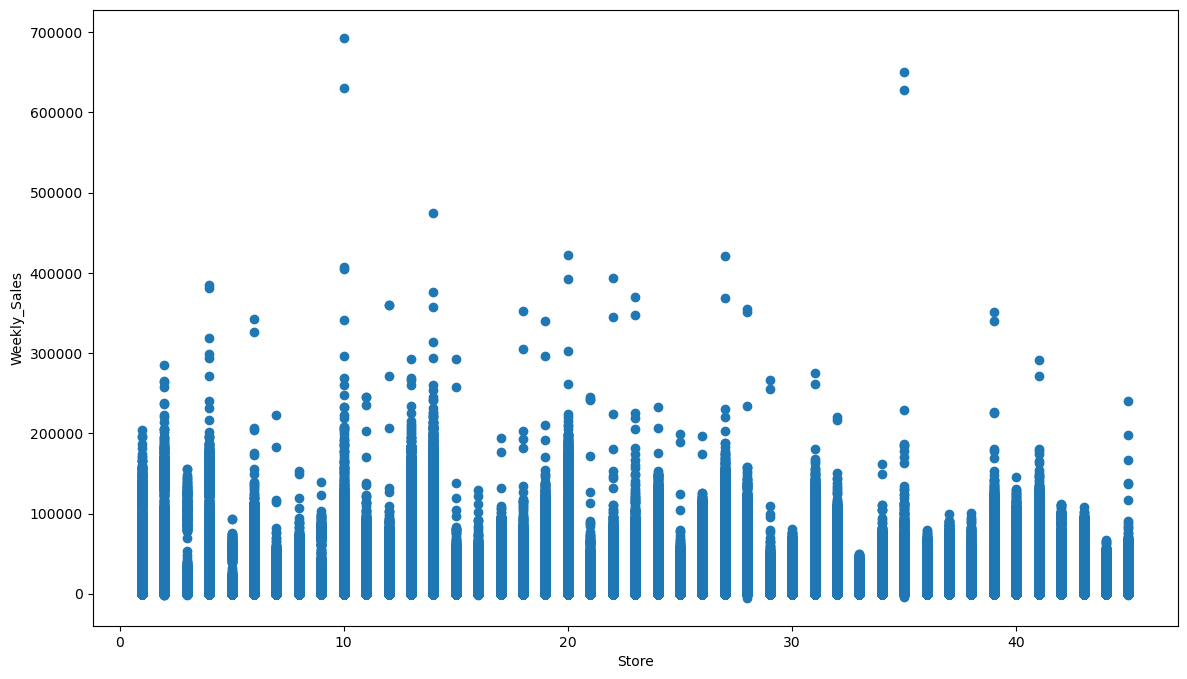

In [20]:
#plot a scatter plot using the scatter function - weekly sales and stores analysis
scatter(traindff,'Store')

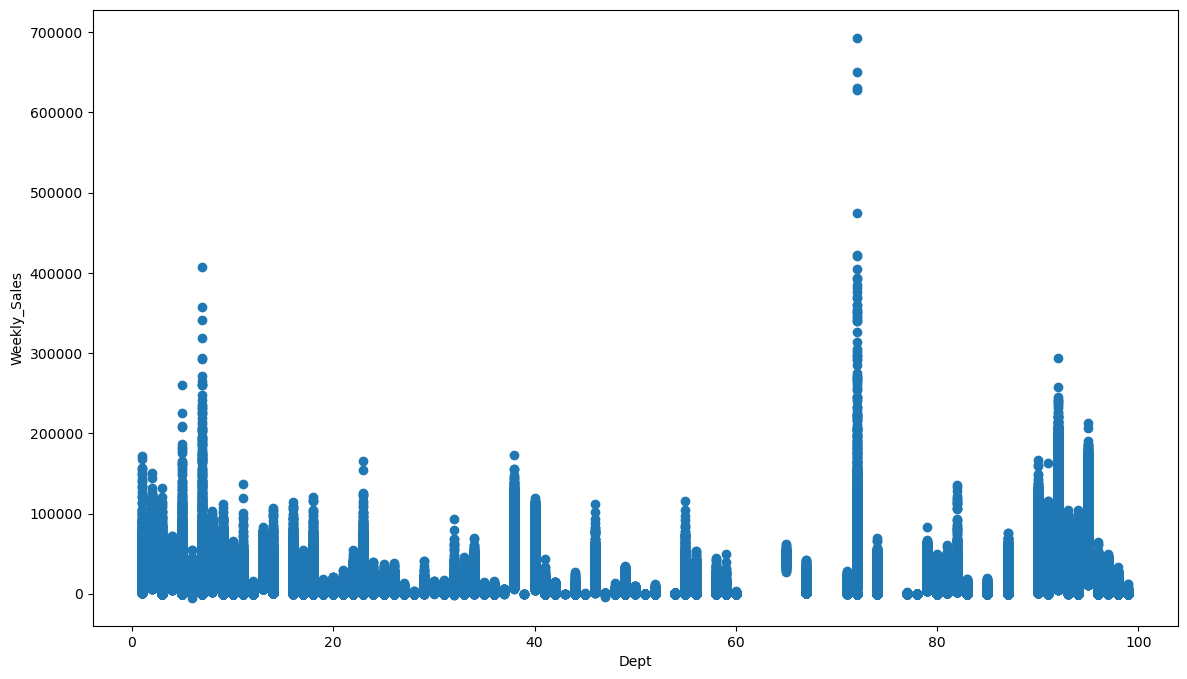

In [21]:
#plot a scatter plot using the scatter function - weekly sales and department analysis
scatter(traindff,'Dept')

In [22]:
traindff.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


In [23]:
traindff['week'] = traindff.Date.dt.isocalendar().week
traindff['year'] = traindff.Date.dt.isocalendar().year

In [24]:
traindff.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,week,year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50,5,2010
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27,5,2010
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12,5,2010
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04,5,2010
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38,5,2010


<AxesSubplot:xlabel='week'>

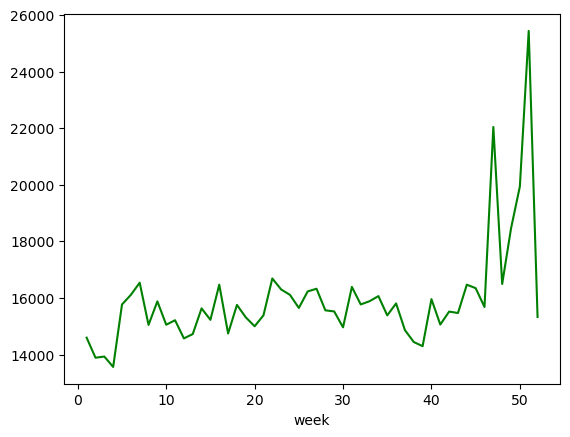

In [25]:
#Line plots for weekly sales for each year
weekly_sales_2011 = traindff[traindff['year']== 2011]['Weekly_Sales'].groupby(traindff['week']).mean()
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values,color= 'green')

In [26]:
weekly_sales_2011

week
1     14599.244973
2     13891.283484
3     13932.367385
4     13566.239462
5     15773.448776
6     16111.706191
7     16541.991212
8     15049.747558
9     15882.557045
10    15056.450540
11    15216.115961
12    14573.827050
13    14726.869261
14    15634.571312
15    15229.708141
16    16472.653827
17    14745.946064
18    15757.215296
19    15317.204186
20    15002.247279
21    15390.233449
22    16691.305332
23    16302.918830
24    16111.226407
25    15649.418342
26    16232.862334
27    16328.646803
28    15566.323502
29    15526.204180
30    14965.150490
31    16393.126313
32    15774.068626
33    15888.028317
34    16068.095036
35    15387.122167
36    15809.069483
37    14865.566897
38    14446.431089
39    14298.824402
40    15960.678959
41    15062.736015
42    15521.325691
43    15470.924781
44    16471.071192
45    16348.811046
46    15683.546288
47    22043.563476
48    16496.511854
49    18458.853056
50    19942.149333
51    25437.146122
52    15332.154858
Name: W

<AxesSubplot:xlabel='week'>

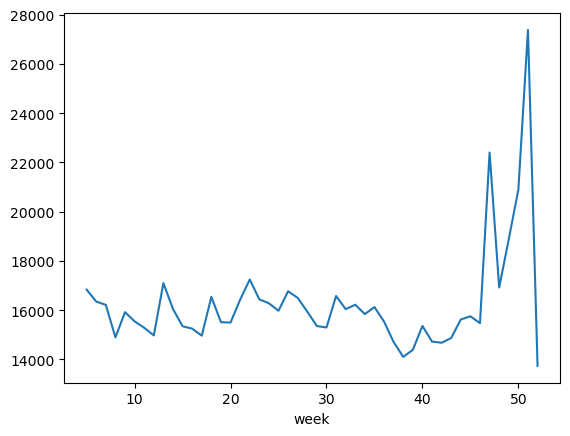

In [27]:
#Line plots for weekly sales for each year
weekly_sales_2010 = traindff[traindff['year']== 2010]['Weekly_Sales'].groupby(traindff['week']).mean()
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values)

In [28]:
weekly_sales_2010

week
5     16836.121997
6     16352.056032
7     16216.658979
8     14899.549688
9     15921.015727
10    15546.850545
11    15286.773578
12    14975.894486
13    17098.620298
14    16050.589780
15    15347.713003
16    15252.114749
17    14967.509147
18    16542.716071
19    15513.374470
20    15499.865359
21    16428.449453
22    17246.922034
23    16440.889213
24    16281.041446
25    15978.414909
26    16769.792424
27    16500.010117
28    15940.675484
29    15357.115672
30    15300.090305
31    16576.684704
32    16044.343374
33    16222.320896
34    15841.870407
35    16129.274645
36    15537.758883
37    14708.339539
38    14105.905324
39    14391.780535
40    15362.048443
41    14726.782747
42    14678.483136
43    14871.361170
44    15625.249792
45    15753.005748
46    15475.166043
47    22403.336705
48    16924.051502
49    18882.893619
50    20892.463619
51    27378.692693
52    13738.538566
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='week'>

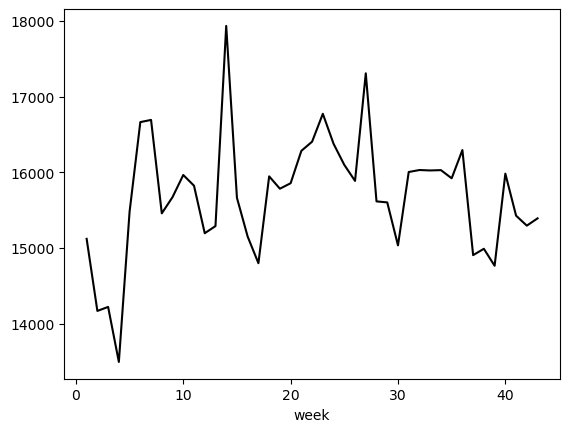

In [29]:
#Line plots for weekly sales for each year
#Line plots for weekly sales for each year
weekly_sales_2012 = traindff[traindff['year']== 2012]['Weekly_Sales'].groupby(traindff['week']).mean()
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values,color= 'black')

In [30]:
weekly_sales_2012

week
1     15121.231736
2     14168.266514
3     14221.357405
4     13494.232612
5     15480.553608
6     16664.247891
7     16693.401051
8     15458.124475
9     15672.586946
10    15965.182956
11    15823.719615
12    15195.472627
13    15289.720371
14    17935.741157
15    15663.171451
16    15150.430178
17    14799.187167
18    15947.275103
19    15784.015806
20    15856.396620
21    16284.414590
22    16405.589439
23    16774.044520
24    16377.574662
25    16098.711574
26    15887.184494
27    17309.362337
28    15616.440413
29    15602.826372
30    15034.829516
31    16004.684719
32    16030.926967
33    16025.195279
34    16029.501216
35    15921.552812
36    16294.692957
37    14905.978648
38    14989.708385
39    14765.327279
40    15983.413747
41    15427.596739
42    15295.732397
43    15391.725681
Name: Weekly_Sales, dtype: float64

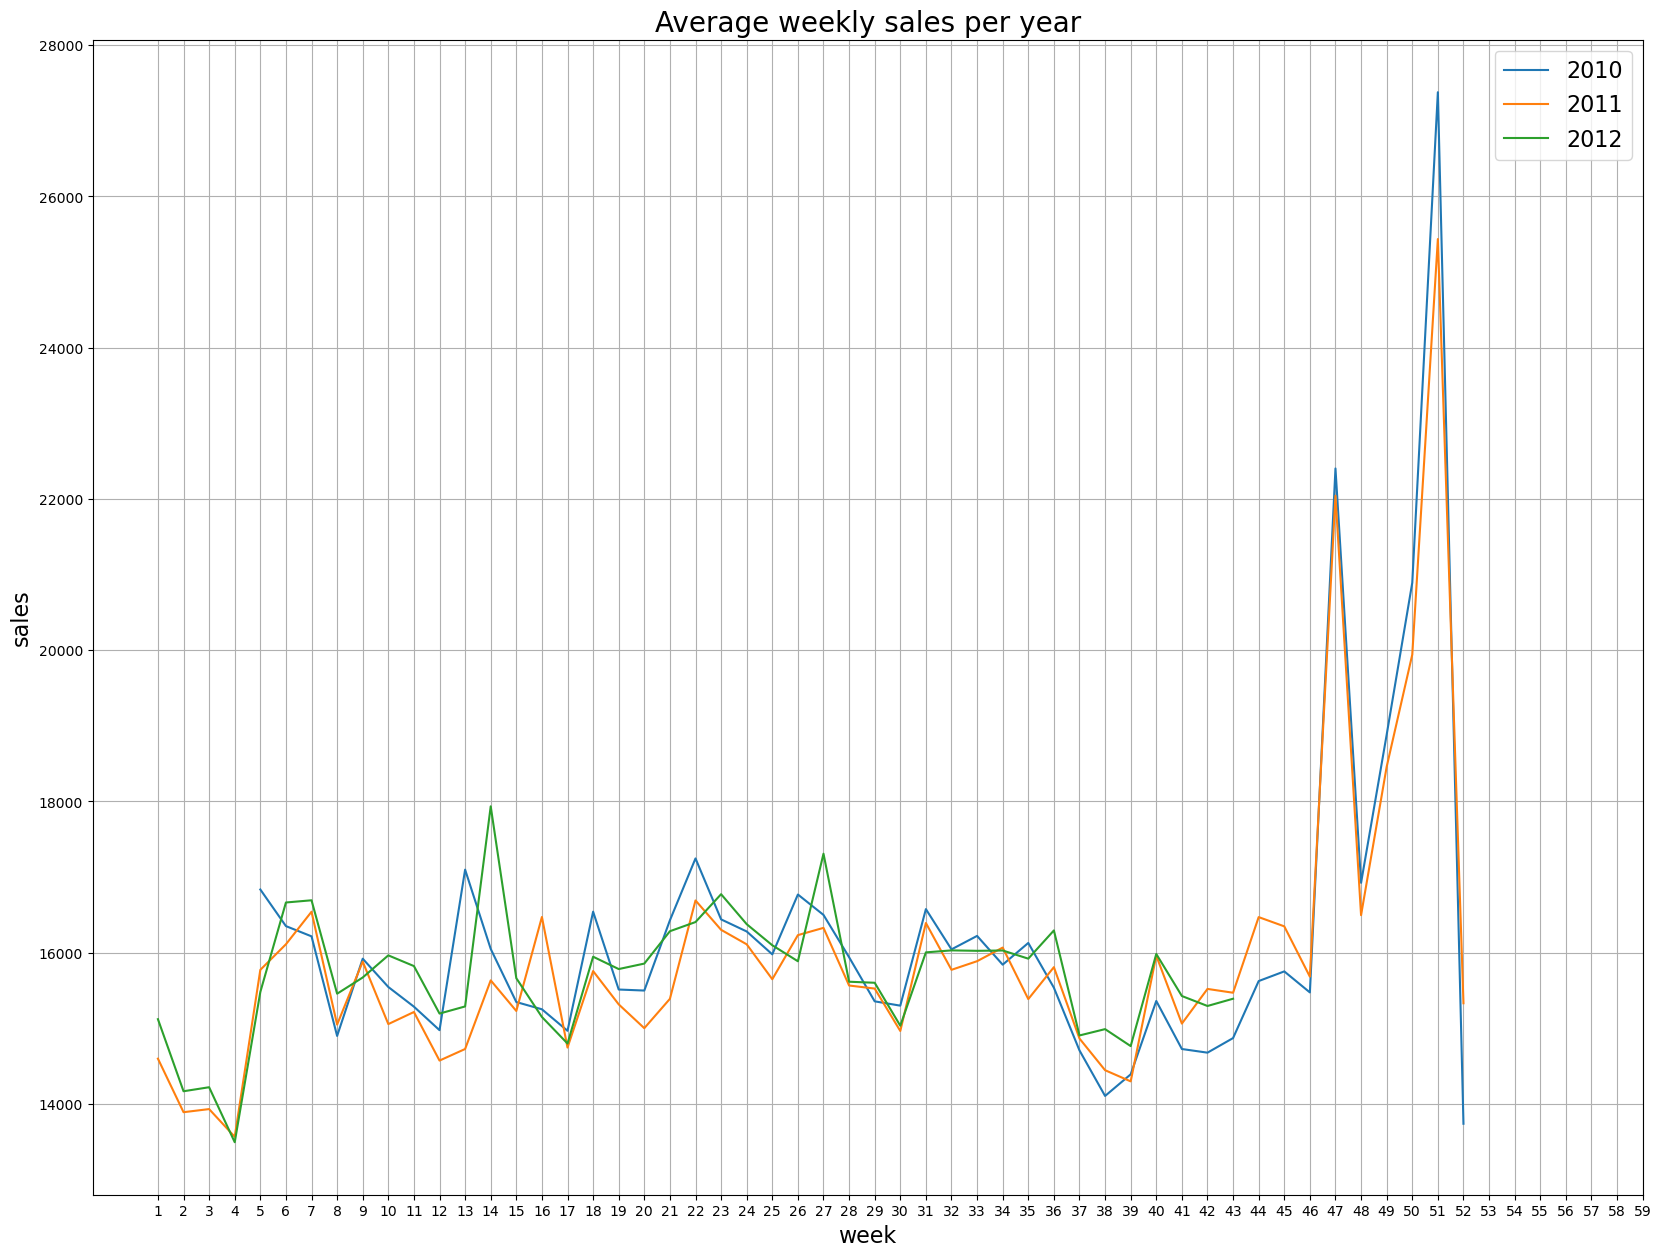

In [31]:
#Plot the weekly sales for years 2010,2011,2012 on a single plot to compare the sales values with respect to week o =n each
#of these specified year for comparing the weekly sales in each year.

plt.figure(figsize=(20,15))
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,60, step=1))
plt.title('Average weekly sales per year',fontsize = 20)
plt.xlabel('week',fontsize = 16)
plt.ylabel('sales',fontsize = 16)
plt.legend(['2010','2011','2012'],fontsize=16)
plt.show()

<AxesSubplot:xlabel='Type', ylabel='Size'>

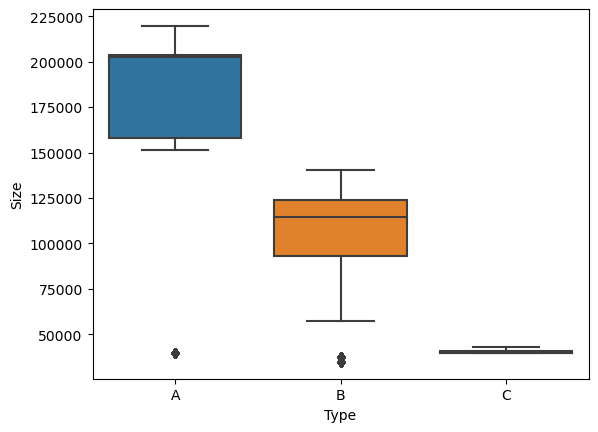

In [32]:
#Box plot
sns.boxplot(x='Type',y='Size',data=traindff)

In [33]:
## which store we have maximum mean weekly sales
weekly_sales_store = traindff['Weekly_Sales'].groupby(traindff['Store']).mean()
weekly_sales_store

Store
1     21710.543621
2     26898.070031
3      6373.033983
4     29161.210415
5      5053.415813
6     21913.243624
7      8358.766148
8     13133.014768
9      8772.890379
10    26332.303819
11    19276.762751
12    14867.308619
13    27355.136891
14    28784.851727
15     9002.493073
16     7863.224124
17    12954.393636
18    15733.313136
19    20362.126734
20    29508.301592
21    11283.435496
22    15181.218886
23    19776.180881
24    18969.106500
25    10308.157810
26    14554.129672
27    24826.984536
28    18714.889803
29     8158.810609
30     8764.237719
31    19681.907464
32    16351.621855
33     5728.414053
34    13522.081671
35    13803.596986
36     8584.412563
37    10297.355026
38     7492.478460
39    21000.763562
40    13763.632803
41    17976.004648
42    11443.370118
43    13415.114118
44     6038.929814
45    11662.897315
Name: Weekly_Sales, dtype: float64

In [34]:
weekly_sales_storedf = pd.DataFrame(weekly_sales_store)
weekly_sales_storedf

,Weekly_Sales
Store,
1,21710.543621
2,26898.070031
3,6373.033983
4,29161.210415
5,5053.415813
6,21913.243624
7,8358.766148
8,13133.014768
9,8772.890379


In [35]:
weekly_sales_storedf.sort_values('Weekly_Sales',ascending=False).style.bar(align='left',width=90)

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


In [36]:
weekly_sales_storedf.sort_values('Weekly_Sales').style.bar(align='left',width=90)

,Weekly_Sales
Store,
5,5053.415813
33,5728.414053
44,6038.929814
3,6373.033983
38,7492.478460
16,7863.224124
29,8158.810609
7,8358.766148
36,8584.412563


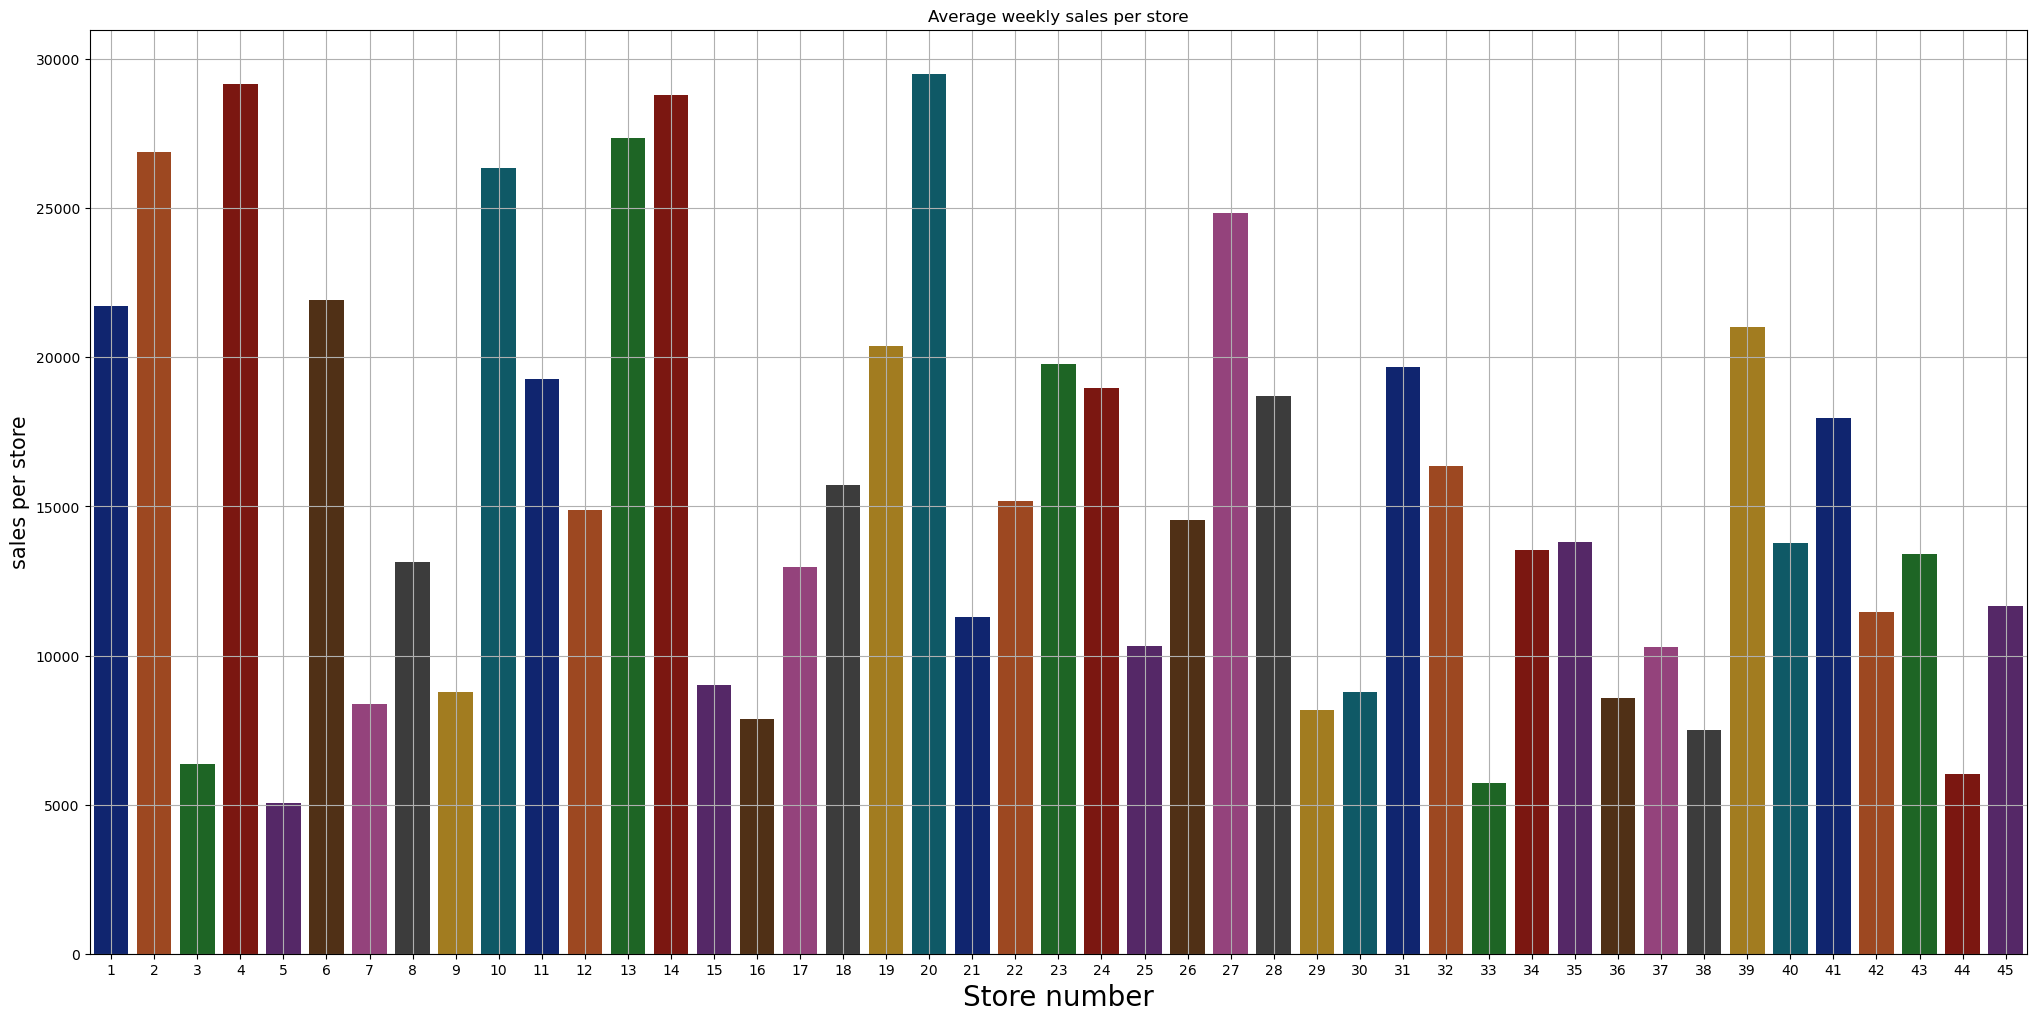

In [37]:
plt.figure(figsize=(25,12))
sns.barplot(weekly_sales_store.index,weekly_sales_store.values,palette='dark')
plt.grid()
plt.title('Average weekly sales per store')
plt.xlabel('Store number',fontsize=20)
plt.ylabel('sales per store',fontsize=15)
plt.show()

In [38]:
weekly_sales_dept = traindff['Weekly_Sales'].groupby(traindff['Dept']).mean()
weekly_sales_deptdf = pd.DataFrame(weekly_sales_dept)

In [39]:
weekly_sales_deptdf.sort_values('Weekly_Sales',ascending = False).style.bar(align= 'left',width = 90)

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


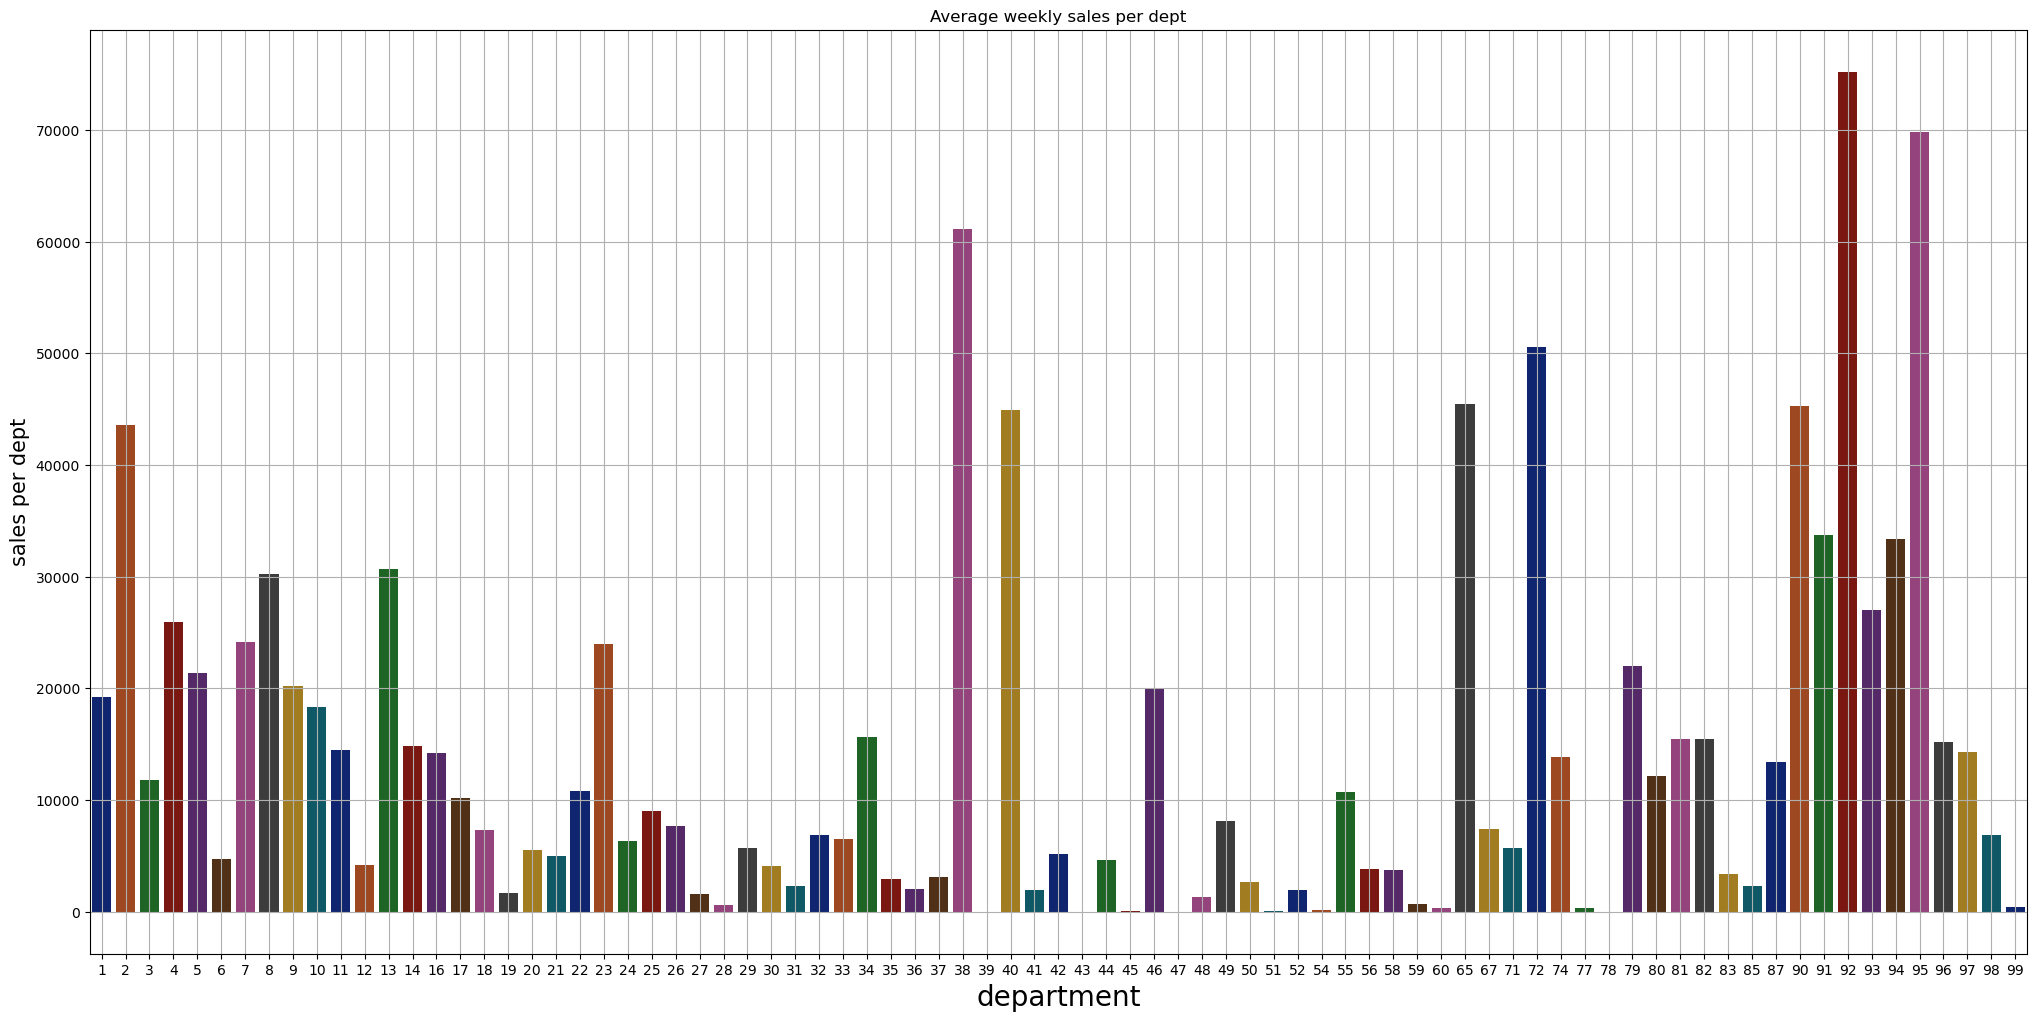

In [40]:
plt.figure(figsize=(25,12))
sns.barplot(weekly_sales_dept.index,weekly_sales_dept.values,palette='dark')
plt.grid()
plt.title('Average weekly sales per dept')
plt.xlabel('department',fontsize=20)
plt.ylabel('sales per dept',fontsize=15)
plt.show()

<AxesSubplot:>

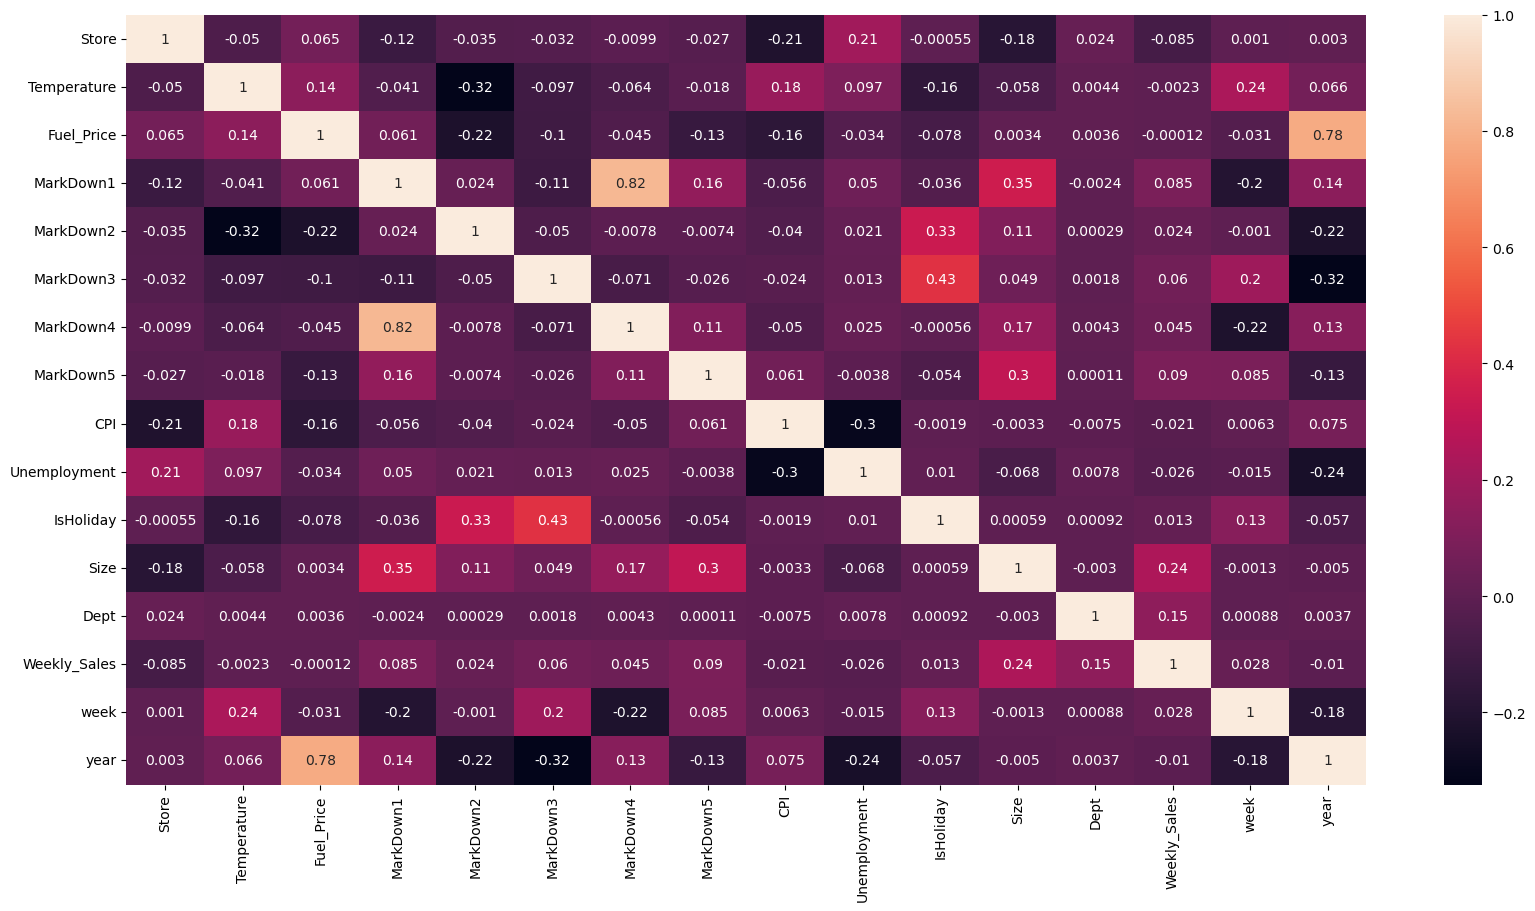

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(traindff.corr(),annot= True)

# Dept 92 has highest sale
2. Dept 47 lowest sale
3. Store 20 high sales
4. Store 5 has least sale
5. Type "A" stores are largest
6. Type "C" c are smallest
7. All year possess sort of same pattern
8. At the end of year we observed highest sales peak throught the year.